# Weeks 8 and 9: Data Exploration with Python

(Review Reading Assignments: Analyzing Tabular Omics Data using Pandas DataFrames, and Data Visualization/Data Visualization with Seaborn)

## Check package versions

In [1]:
import sys
!{sys.executable} -m pip install seaborn==0.13.2

Looking in links: file:///Users/yeemayseah/.pip/wheelhouse


In [2]:
!{sys.executable} -m pip install matplotlib==3.7.5

Looking in links: file:///Users/yeemayseah/.pip/wheelhouse


In [3]:
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns


Bad key text.latex.preview in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95    

## 1. Explore [this dataset on infectious diseases from the CA Dept. of Public Health](https://catalog.data.gov/dataset/infectious-diseases-by-disease-county-year-and-sex-d8912).

In [4]:
# Save the web address (url) in a python string
dataset_url = 'https://data.chhs.ca.gov/dataset/03e61434-7db8-4a53-a3e2-1d4d36d6848d/resource/75019f89-b349-4d5e-825d-8b5960fc028c/download/odp_idb_2001_2022_ddg_compliant.csv'

# Set the name of the file where we want to save the data
data_file_name = 'ca_id.csv'

# Download the data
urlretrieve(dataset_url, data_file_name)

('ca_id.csv', <http.client.HTTPMessage at 0x7fef418c4fd0>)

In [58]:
# Load the text version of the table (a csv file) into python using pandas
feature_table = pd.read_csv(data_file_name)

In [59]:
feature_table.shape

(189921, 9)

In [60]:
feature_table.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Anaplasmosis,Alameda,2001,Female,0.0,746596,-,0.0,0.494
1,Anaplasmosis,Alameda,2001,Male,0.0,718968,-,0.0,0.513
2,Anaplasmosis,Alameda,2001,Total,0.0,1465564,-,0.0,0.252
3,Anaplasmosis,Alameda,2002,Female,0.0,747987,-,0.0,0.493
4,Anaplasmosis,Alameda,2002,Male,0.0,720481,-,0.0,0.512


## 2. Select a disease of your choice. Plot the number of cases of that disease by county, for the year 2022.

In [8]:
%matplotlib inline
# Apply the theme
sns.set_context("notebook", font_scale=1.0)

In [9]:
print(pd.__version__)
print(sns.__version__)

1.3.4
0.13.2


In [61]:
disease_2022 = feature_table.loc[(feature_table['Disease'] == 'Leprosy') &
                  (feature_table['Year'] == 2022)]

In [62]:
disease_2022.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
87501,Leprosy,Alameda,2022,Female,0.0,856569,-,0.0,0.431
87502,Leprosy,Alameda,2022,Male,0.0,832969,-,0.0,0.443
87503,Leprosy,Alameda,2022,Total,0.0,1638979,-,0.0,0.225
87567,Leprosy,Alpine,2022,Female,0.0,576,-,0.0,638.384
87568,Leprosy,Alpine,2022,Male,0.0,563,-,0.0,653.077


Text(0.5, 1.0, 'Leprosy in California Counties, 2022')

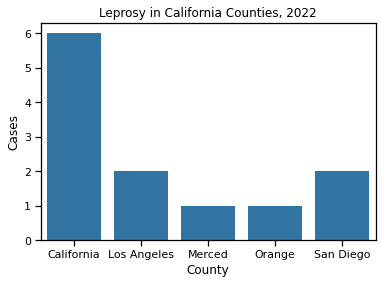

In [63]:
sns.barplot(data=disease_2022.loc[disease_2022['Cases'] > 0], x='County', y='Cases').set_title('Leprosy in California Counties, 2022')

## 3. Select a disease of your choice. Plot the number of cases of that disease in Los Angeles between the years 2001-2010.

In [64]:
disease_la = feature_table.loc[(feature_table['Disease'] == 'Shigellosis') &
                  (feature_table['County'] == 'Los Angeles')]

Text(0.5, 1.0, 'Shigellosis in Los Angeles, 2001-2022')

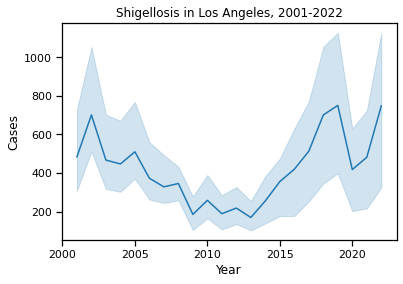

In [65]:
sns.lineplot(data=disease_la, x='Year', y='Cases').set_title('Shigellosis in Los Angeles, 2001-2022')

## 4. Create another plot of your choice, with an appropriate title.

In [109]:
shigellosis = feature_table.loc[(feature_table['Disease'] == 'Shigellosis') &
                             ((feature_table['County'] == 'San Francisco') |
                              (feature_table['County'] == 'Los Angeles') |
                              (feature_table['County'] == 'Sacramento'))].copy()

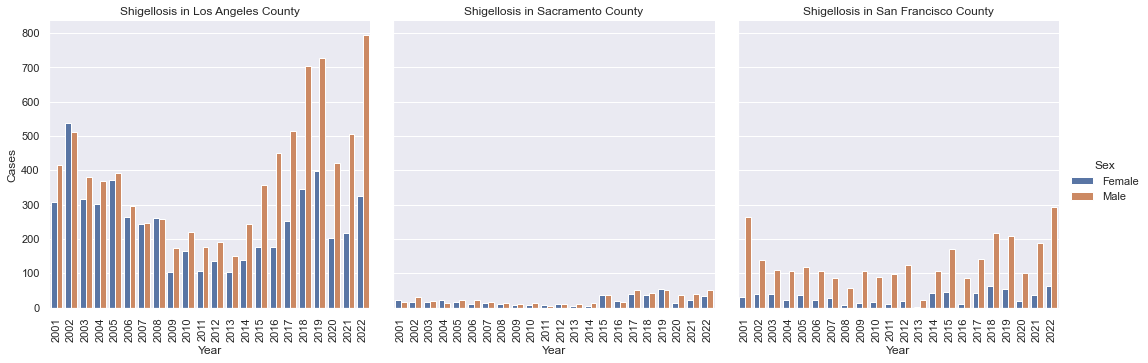

In [110]:
#fig = sns.barplot(data=shigellosis.loc[shigellosis['Sex'] == 'Total'], x='Year', y='Cases', hue='County')
ax = sns.catplot(kind='bar', data=shigellosis.loc[shigellosis['Sex'] != 'Total'], x='Year', y='Cases', hue='Sex', col='County')

# Rotate labels
#fig.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', rotation=90)

# Set title
#fig.set_title('Shigellosis in three CA counties')
ax.set_titles("Shigellosis in {col_name} {col_var}")

# Reposition legend
#sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

# Week 10: Discussion
## Does shigellosis really occur more often in LA than in other counties?

In [111]:
shigellosis['Cases_per_100kPopulation'] = 100000 * shigellosis['Cases'] / shigellosis['Population']

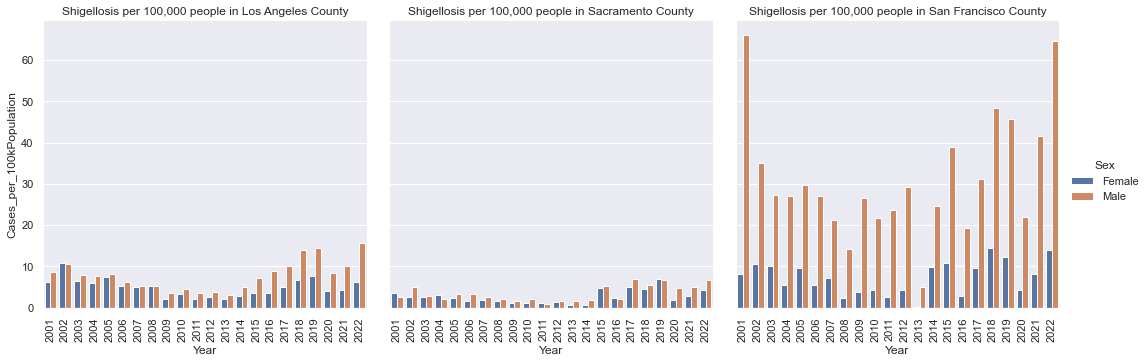

In [112]:
#fig2 = sns.barplot(data=shigellosis.loc[shigellosis['Sex'] == 'Total'], x='Year', y='Cases_per_100kPopulation', hue='County')
ax2 = sns.catplot(kind='bar', data=shigellosis.loc[shigellosis['Sex'] != 'Total'], x='Year', y='Cases_per_100kPopulation', hue='Sex', col='County')

# Rotate labels
#fig2.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

# Set title
#fig2.set_title("Shigellosis per 100,000 people in three CA counties")
ax2.set_titles("Shigellosis per 100,000 people in {col_name} {col_var}")

# Reposition legend
#sns.move_legend(fig2, "upper left", bbox_to_anchor=(1, 1))

## How does San Francisco County's rate of shigellosis compare to other counties in CA?

Here's a little introduction to [Z-scores](https://statsthinking21.github.io/statsthinking21-core-site/fitting-models.html#z-scores).

> Intuitively, you can think of a Z-score as telling you how far away any data point is from the mean, in units of standard deviation. 

In [113]:
shigellosis_all_counties = feature_table.loc[(feature_table['Disease'] == 'Shigellosis') & 
                                             (feature_table['Sex'] == 'Total')].copy()
shigellosis_all_counties['Cases_per_100kPopulation'] = 100000 * shigellosis_all_counties['Cases'] / shigellosis_all_counties['Population']
shigellosis_all_counties['Z-scored_Rate'] = (shigellosis_all_counties['Cases_per_100kPopulation'] - shigellosis_all_counties['Cases_per_100kPopulation'].mean()) / shigellosis_all_counties['Cases_per_100kPopulation'].std()

## In one year (2022)?

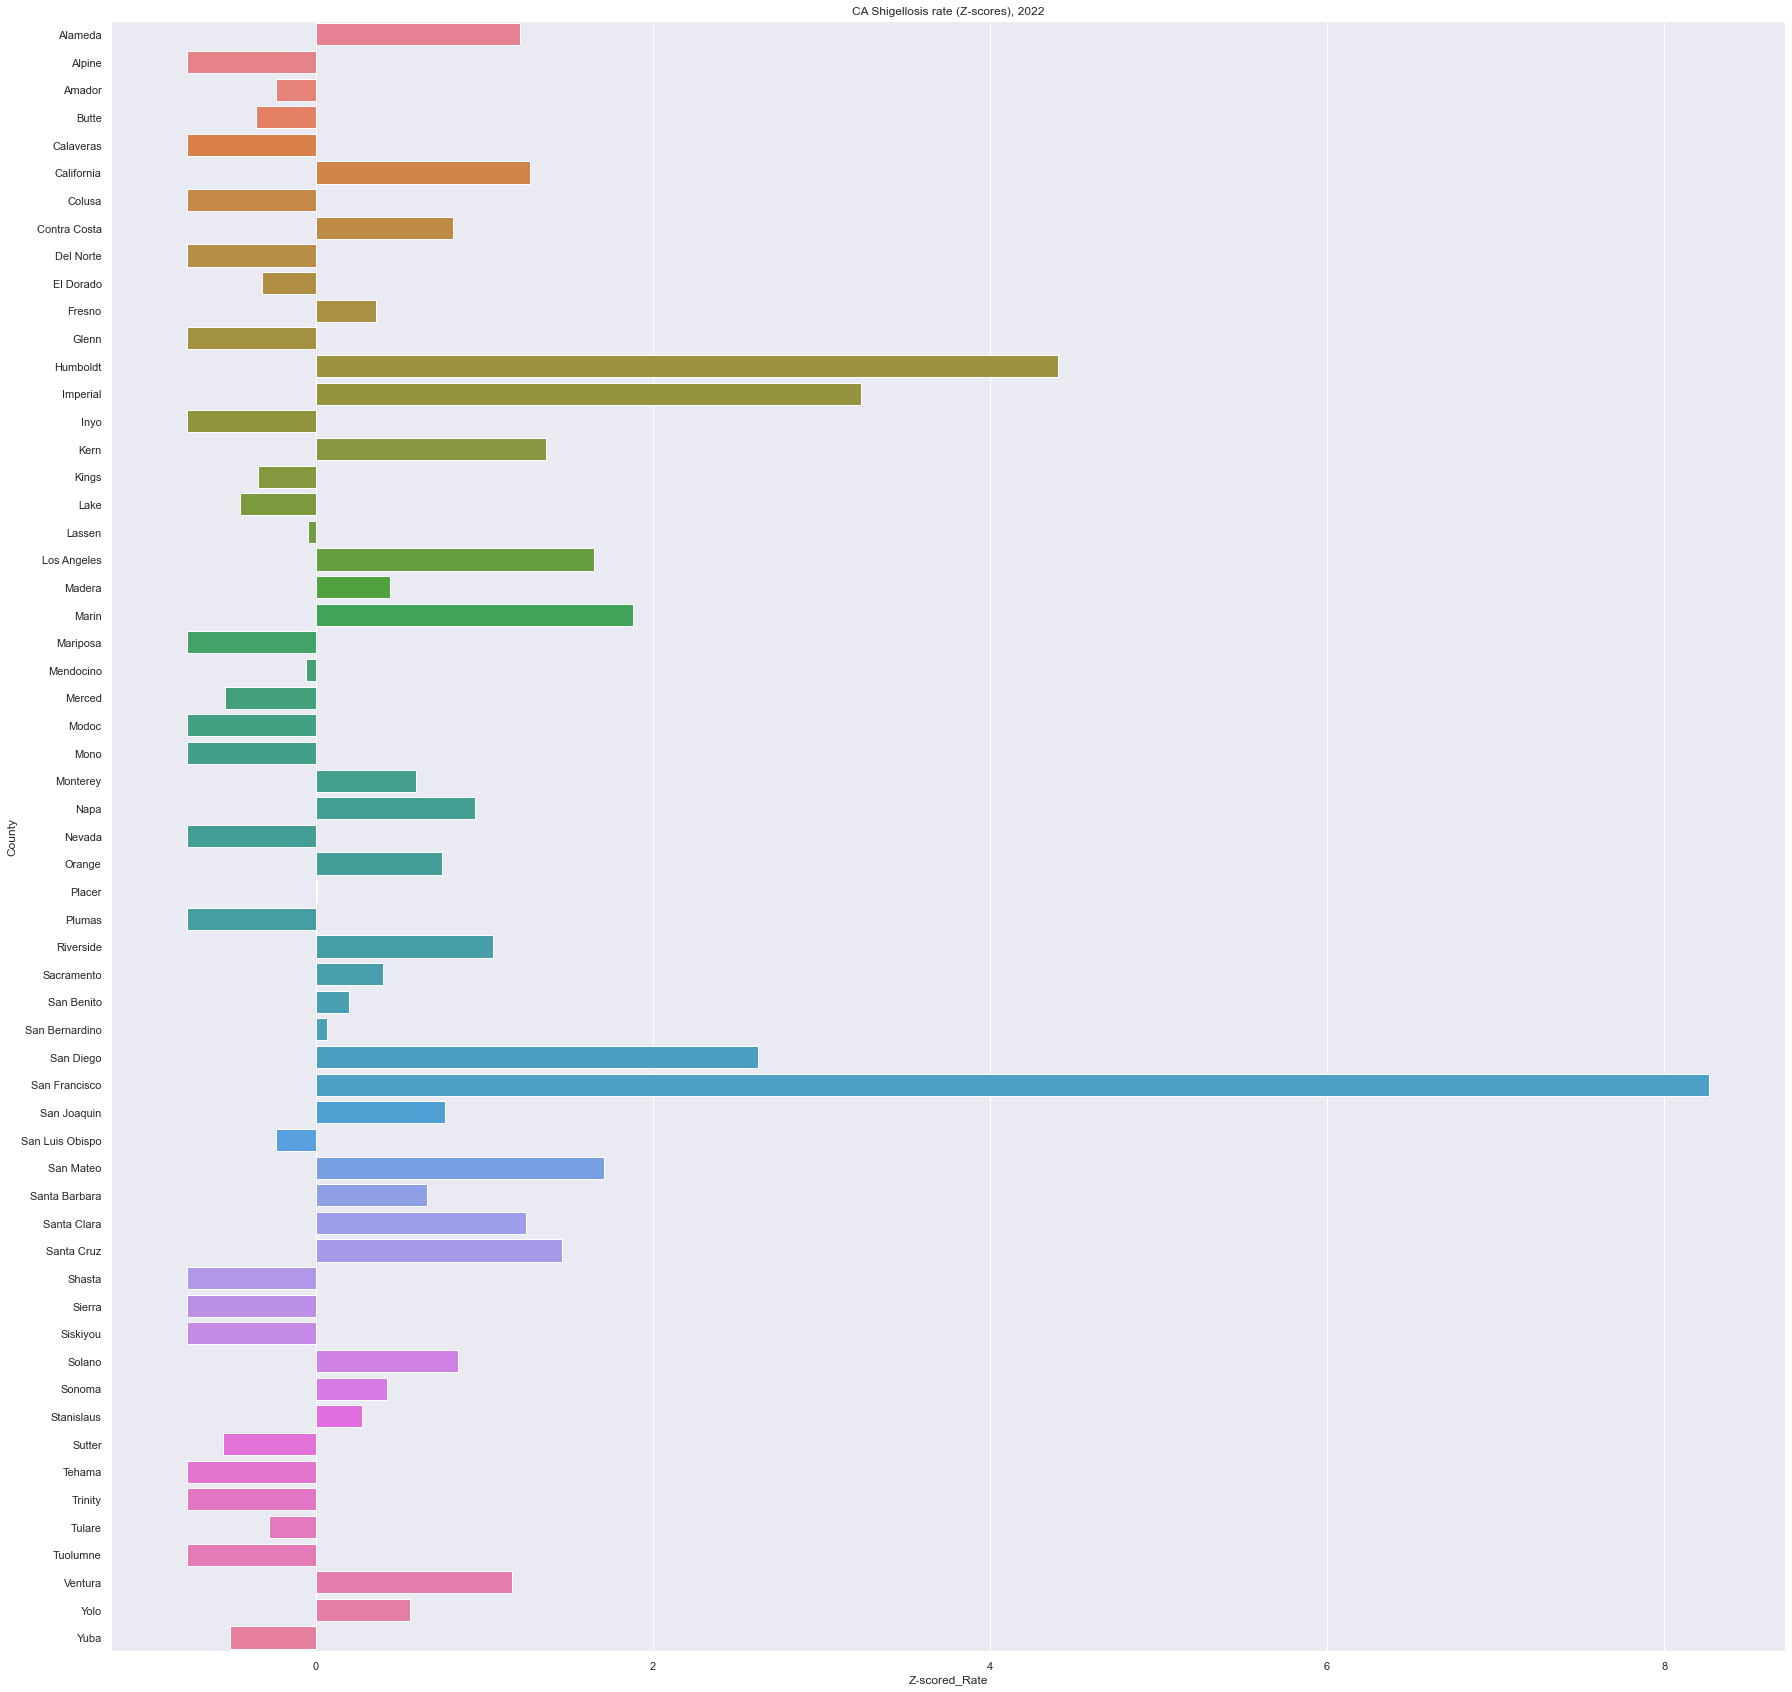

In [114]:
fig3 = sns.barplot(data=shigellosis_all_counties.loc[(shigellosis_all_counties['Sex'] == 'Total') & 
                                                     (shigellosis_all_counties['Year'] == 2022)], 
                   y='County', x='Z-scored_Rate', hue='County')

# Set title
fig3.set_title("CA Shigellosis rate (Z-scores), 2022")

sns.set(rc={"figure.figsize": (30, 30)})

## In all years?

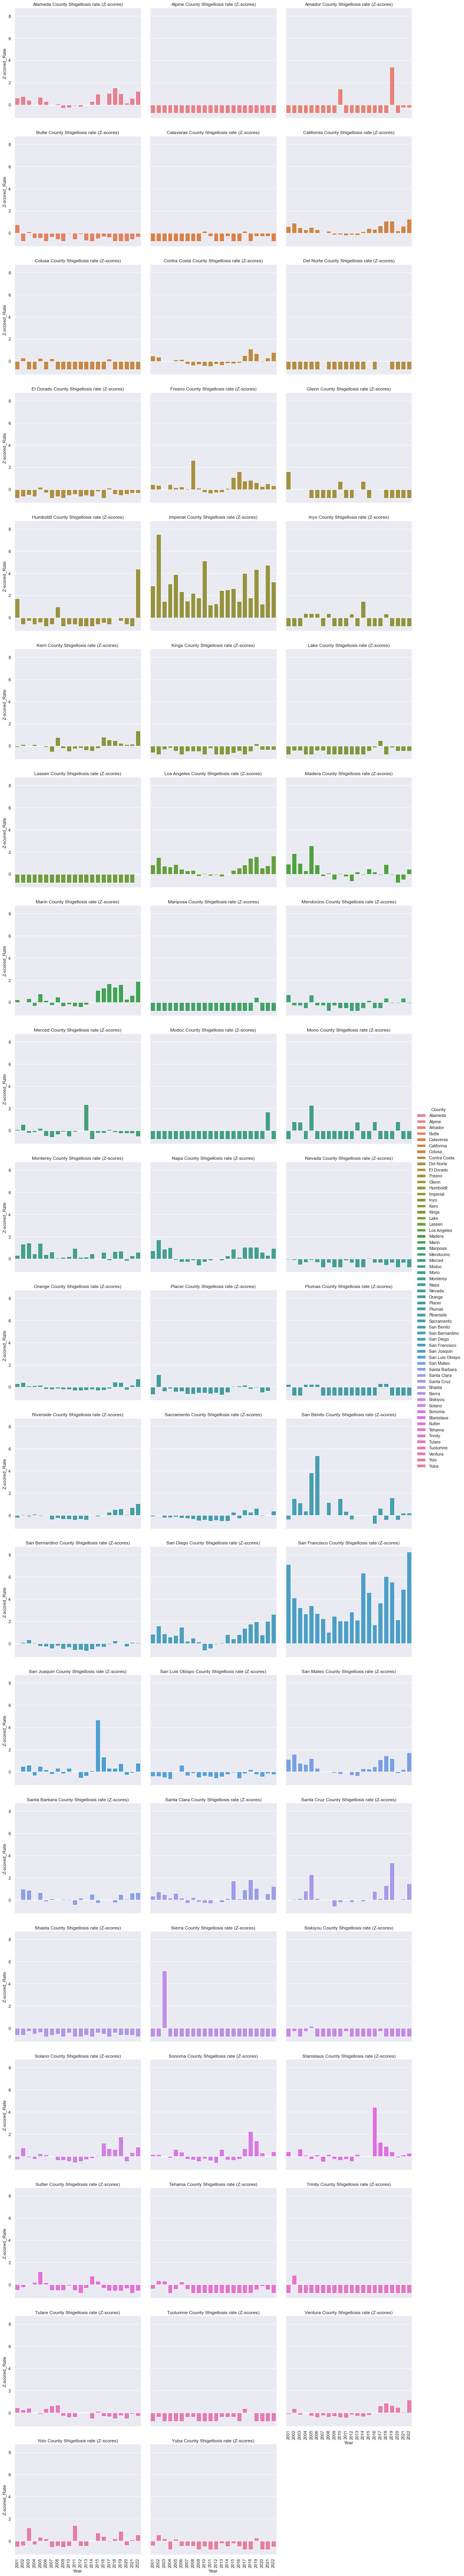

In [115]:
ax4 = sns.catplot(kind='bar', data=shigellosis_all_counties.loc[(shigellosis_all_counties['Sex'] == 'Total')], 
                  x='Year', y='Z-scored_Rate', hue='County', col='County', col_wrap=3)

# Rotate labels
ax4.tick_params(axis='x', rotation=90)

# Set title
ax4.set_titles("{col_name} {col_var} Shigellosis rate (Z-scores)")

# Reapply the theme
sns.set_context("notebook", font_scale=1.0)

# Other Datasets

## NNDS (National Notifiable Diseases Surveillance System (NNDSS))
Dataset from [here](https://data.cdc.gov/NNDSS/NNDSS-TABLE-1FF-Severe-acute-respiratory-syndrome-/cw4r-vcr3/about_data).

In [127]:
nndss = pd.read_csv('../data/NNDSS_-_TABLE_1FF._Severe_acute_respiratory_syndrome-associated_coronavirus_disease_to_Shigellosis_20240307.csv')

In [134]:
to_drop = ['Severe acute respiratory syndrome-associated coronavirus desease, Current week',
       'Severe acute respiratory syndrome-associated coronavirus desease, Current week, flag',
       'Severe acute respiratory syndrome-associated coronavirus desease, Previous 52 weeks Max†',
       'Severe acute respiratory syndrome-associated coronavirus desease, Previous 52 weeks Max†, flag',
       'Severe acute respiratory syndrome-associated coronavirus desease, Cum 2021†',
       'Severe acute respiratory syndrome-associated coronavirus desease, Cum 2021†, flag',
       'Severe acute respiratory syndrome-associated coronavirus desease, Cum 2020†',
       'Severe acute respiratory syndrome-associated coronavirus desease, Cum 2020†, flag',
       'Shiga toxin-producing Escherichia coli(STEC), Current week',
       'Shiga toxin-producing Escherichia coli(STEC), Current week, flag',
       'Shiga toxin-producing Escherichia coli(STEC), Previous 52 weeks Max†',
       'Shiga toxin-producing Escherichia coli(STEC), Previous 52 weeks Max†, flag',
       'Shiga toxin-producing Escherichia coli(STEC), Cum 2021†',
       'Shiga toxin-producing Escherichia coli(STEC), Cum 2021†, flag',
       'Shiga toxin-producing Escherichia coli(STEC), Cum 2020†',
       'Shiga toxin-producing Escherichia coli(STEC), Cum 2020†, flag']

In [137]:
nndss.drop(axis=1, labels=to_drop, inplace=True)

In [138]:
nndss

,Reporting Area,MMWR Year,MMWR Week,"Shigellosis, Current week","Shigellosis, Current week, flag","Shigellosis, Previous 52 weeks Max†","Shigellosis, Previous 52 weeks Max†, flag","Shigellosis, Cum 2021†","Shigellosis, Cum 2021†, flag","Shigellosis, Cum 2020†","Shigellosis, Cum 2020†, flag",Location 1,Location 2,Reporting Area Sort,geocode
0,NEW ENGLAND,2021,1,NaN,-,11,NaN,NaN,-,9.0,NaN,NaN,NEW ENGLAND,20210102,NaN
1,MAINE,2021,1,NaN,-,2,NaN,NaN,-,NaN,-,MAINE,NaN,20210104,POINT (-69.06137 45.117911)
2,MASSACHUSETTS,2021,1,NaN,-,7,NaN,NaN,-,6.0,NaN,MASSACHUSETTS,NaN,20210105,POINT (-71.481104 42.151077)
3,NEW HAMPSHIRE,2021,1,NaN,-,2,NaN,NaN,-,NaN,-,NEW HAMPSHIRE,NaN,20210106,POINT (-71.57139 43.680429)
4,RHODE ISLAND,2021,1,NaN,-,4,NaN,NaN,-,NaN,-,RHODE ISLAND,NaN,20210107,POINT (-71.534637 41.572574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,MASSACHUSETTS,2021,51,2.0,NaN,7,NaN,160.0,NaN,123.0,NaN,MASSACHUSETTS,NaN,20215105,POINT (-71.481104 42.151077)
3636,MOUNTAIN,2021,51,11.0,NaN,33,NaN,852.0,NaN,662.0,NaN,NaN,MOUNTAIN,20215148,NaN
3637,INDIANA,2021,51,NaN,-,1,NaN,4.0,NaN,57.0,NaN,INDIANA,NaN,20215116,POINT (-86.2818 39.919991)
3638,NON-US RESIDENTS,2021,51,NaN,-,0,NaN,NaN,-,2.0,NaN,NaN,NON-US RESIDENTS,20215169,NaN


## NHANES (National Health and Nutrition Examination Survey)
[About NHANES](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm)

Dataset from [here](https://catalog.data.gov/dataset/nhanes-select-infectious-diseases-prevalence-estimates).

In [116]:
nhanes = pd.read_csv('../data/NHANES_Select_Infectious_Diseases_Prevalence_Estimates_20240307.csv')

In [124]:
nhanes

,Survey Years,Sex,Age Group,Race and Hispanic Origin,Infectious Disease,Percent,Standard Error,Lower 95% CI Limit,Upper 95% CI Limit,Presentation Standard,Note1,Notea
0,1999-2000,All,20-49,All,Herpes Simplex Virus Type 1 (HSV-1),62.5,1.1,60.0,64.9,NaN,NaN,NaN
1,1999-2000,All,20-49,Non-Hispanic White,Herpes Simplex Virus Type 1 (HSV-1),55.4,1.7,51.5,59.2,NaN,NaN,NaN
2,1999-2000,All,20-49,Non-Hispanic Black,Herpes Simplex Virus Type 1 (HSV-1),70.7,3.1,63.4,77.3,NaN,NaN,NaN
3,1999-2000,All,20-49,Non-Hispanic Asian,Herpes Simplex Virus Type 1 (HSV-1),NaN,NaN,NaN,NaN,NaN,Data are only available for Non-Hispanic Asian...,*
4,1999-2000,All,20-49,Hispanic,Herpes Simplex Virus Type 1 (HSV-1),NaN,NaN,NaN,NaN,NaN,Data are only available for Non-Hispanic Asian...,*
...,...,...,...,...,...,...,...,...,...,...,...,...
335,2017-2018,Female,40-49,All,Herpes Simplex Virus Type 2 (HSV-2),29.2,3.5,22.0,37.4,NaN,NaN,NaN
336,2017-2018,Male,20-49,All,Herpes Simplex Virus Type 2 (HSV-2),10.0,1.3,7.4,13.2,NaN,NaN,NaN
337,2017-2018,Male,20-29,All,Herpes Simplex Virus Type 2 (HSV-2),5.0,1.1,2.8,8.0,NaN,NaN,NaN
338,2017-2018,Male,30-39,All,Herpes Simplex Virus Type 2 (HSV-2),11.0,2.1,7.0,16.4,NaN,NaN,NaN


In [125]:
nhanes['Infectious Disease'].value_counts()

Herpes Simplex Virus Type 1 (HSV-1)    170
Herpes Simplex Virus Type 2 (HSV-2)    170
Name: Infectious Disease, dtype: int64

# Chicago
Dataset downloaded from [here](https://catalog.data.gov/dataset/public-health-statistics-selected-public-health-indicators-by-chicago-community-area).

In [121]:
chi_id = pd.read_csv('../data/Public_Health_Statistics_-_Selected_public_health_indicators_by_Chicago_community_area_-_Historical.csv')

In [126]:
chi_id

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Heights,12.0,61.0,19.6,75.4,16.2,65.0,38.0,47.9,...,1.5,1298.2,1274.2,3.0,15.7,1.1,42.4,15.6,19709,18.3
73,74,Mount Greenwood,12.5,59.0,8.4,94.5,15.1,7.7,2.2,34.6,...,0.0,NaN,.,0.0,3.1,1.1,37.0,4.5,34221,6.9
74,75,Morgan Park,13.2,67.5,10.6,74.5,12.3,46.7,19.9,32.4,...,1.3,800.5,741.1,2.6,13.7,0.8,39.4,10.9,26185,14.9
75,76,O'Hare,15.8,70.0,3.5,82.0,5.0,15.9,5.6,20.5,...,0.5,NaN,.,6.3,9.5,1.9,26.5,11.0,29402,4.7
